#### **1a. Análisis exploratorio de Dataframe _data_exam1_**

In [14]:
# Importar Librerías y cargue de archivo
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import numpy as np
from statsmodels.stats.stattools import durbin_watson

# 1. Cargue por Colab
"""
from google.colab import drive
drive.mount('/content/drive')
data1 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Analisis_Cuantitativo/AnalisisCuantitativo_Taller1/data_exam1.xlsx', sheet_name='data1')
"""
# 2. Cargue por Máquina Local
data1 = pd.read_excel('data_exam1.xlsx', sheet_name='data1')

                 Y            X        Ind
count  1000.000000  1000.000000  1000.0000
mean     46.953751     9.976858     0.2000
std      22.046143     3.762567     0.4002
min     -34.894319    -4.263757     0.0000
25%      32.427643     7.638899     0.0000
50%      45.460252     9.952888     0.0000
75%      61.587567    12.379984     0.0000
max     135.542574    25.628678     1.0000


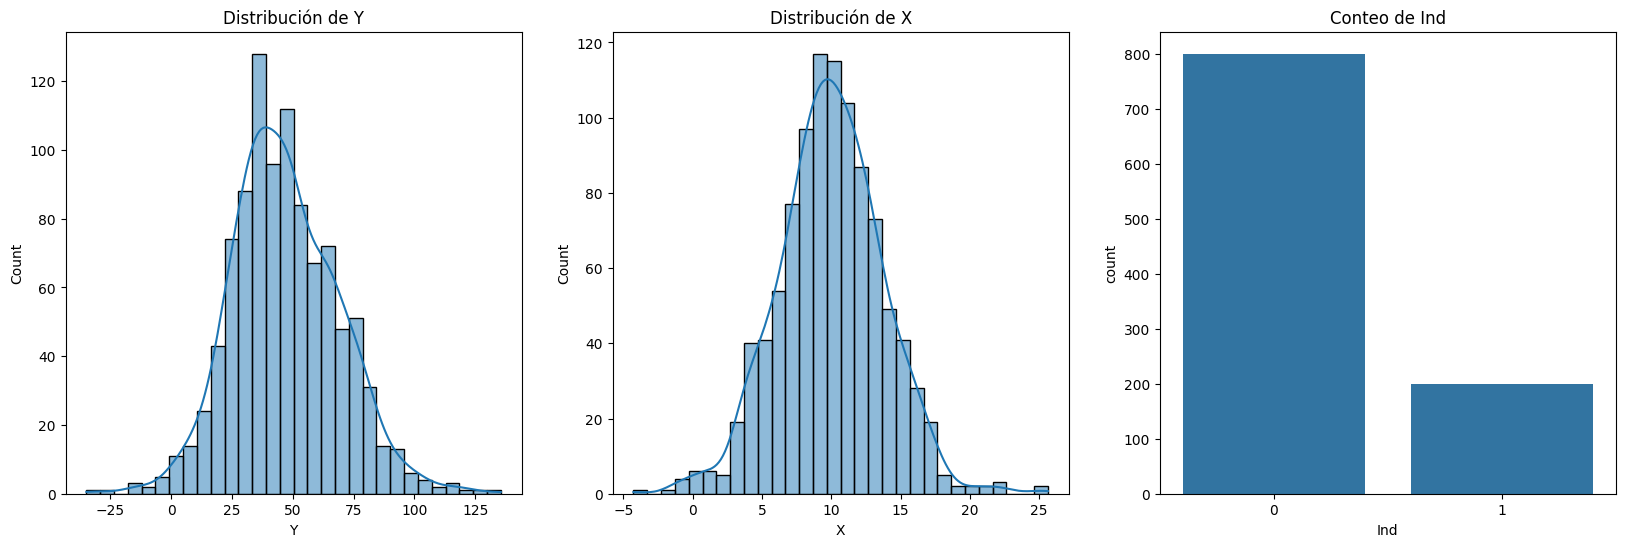

In [2]:
# Análisis descriptivo
descriptive_stats = data1.describe()
print(descriptive_stats)

# Visualización de la distribución de las variables
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Histogramas
sns.histplot(data1['Y'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribución de Y')

sns.histplot(data1['X'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Distribución de X')

# Conteo de la variable categórica Ind
sns.countplot(x='Ind', data=data1, ax=axes[2])
axes[2].set_title('Conteo de Ind')

plt.show()

Del análisis exporatorio del Dataframe se puede decir que:

- El dataframe cuenta con 1000 registros..
- La media de la variable dependiente Y es de 46.95, mientras que la de X es de 9.97.
- Las variables Y y X tienen distribuciones casi normales, aunque Y tiene una mayor dispersión en los valores por su forma de campana un poco más ancha.
- Existe una variab;e categórica denominada Ind que cambia entre 0 y 1, el 20% de los datos tiene valor de 1.


_Procedemos a cruzar variables y a realizar un diagrama de BoxPlot para revisar outliers y dispersión_

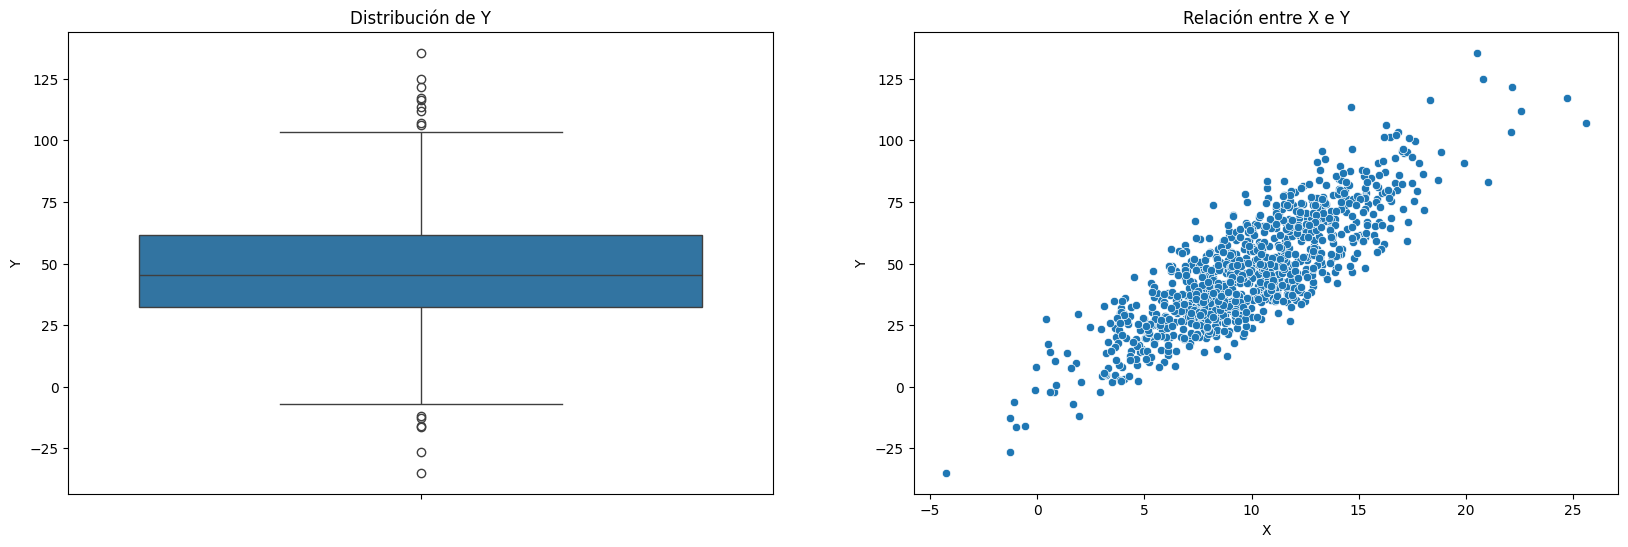

Número de outliers en la variable Y: 15


In [3]:
# Crear una figura con dos subplots uno al lado del otro
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Boxplot para observar la distribución de Y
sns.boxplot(ax=axes[0], y='Y', data=data1)
axes[0].set_title('Distribución de Y')

# Scatter plot de Y vs X
sns.scatterplot(ax=axes[1], x='X', y='Y', data=data1)
axes[1].set_title('Relación entre X e Y')

plt.show()

# Calcular el rango intercuartílico (IQR)
Q1 = data1['Y'].quantile(0.25)
Q3 = data1['Y'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar y contar outliers
outliers = data1[(data1['Y'] < lower_bound) | (data1['Y'] > upper_bound)]
num_outliers = outliers.shape[0]
print(f'Número de outliers en la variable Y: {num_outliers}')

Podemos observar que existen 15 puntos que están por fuera del rango intercuartil, 15 puntos que no son significativos de la muestra, por lo que procedemos a eliminarlos del dataframe original.

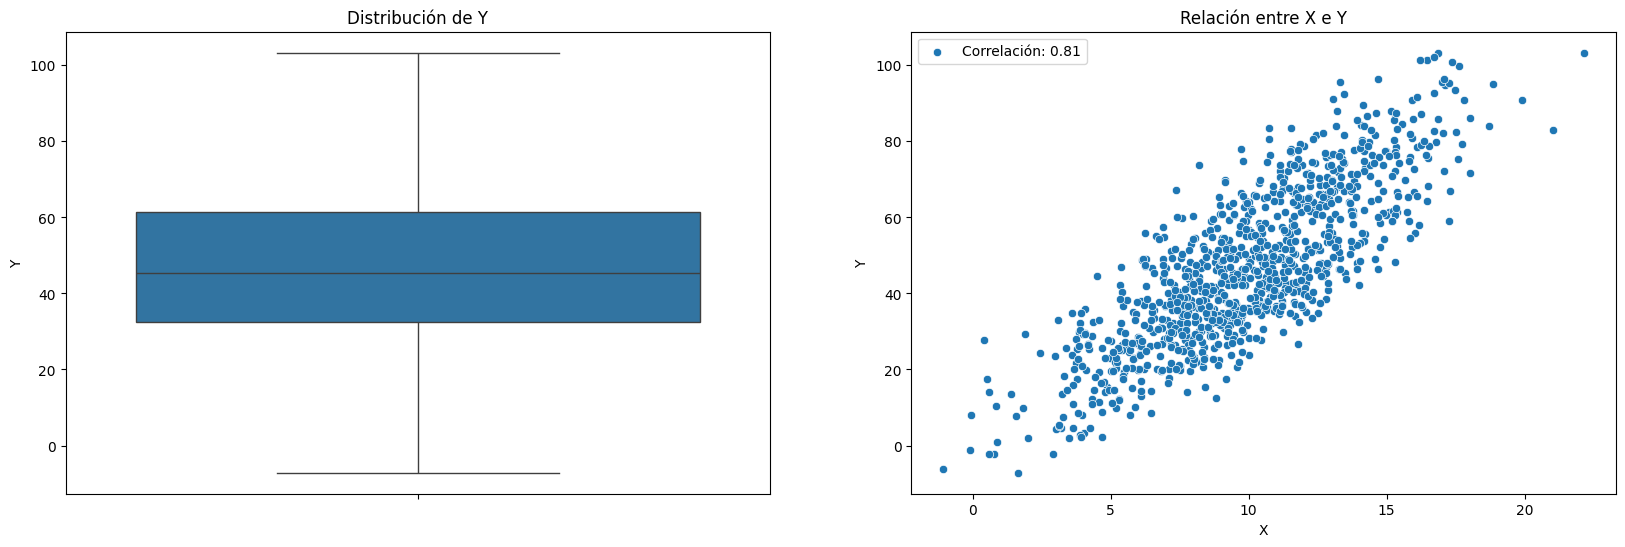

,Y,X,Ind
count,985.000000,985.000000,985.000000
mean,46.718472,9.946817,0.203046
std,20.496121,3.529714,0.402471
min,-7.153930,-1.063922,0.000000
25%,32.497204,7.656245,0.000000
50%,45.379886,9.921362,0.000000
75%,61.319076,12.301068,0.000000
max,103.318957,22.129633,1.000000


In [4]:
# Filtrar el dataframe para eliminar los outliers
data1_sin_outliers = data1[(data1['Y'] >= lower_bound) & (data1['Y'] <= upper_bound)]

# Calcular la correlación entre Y y X
correlation = data1_sin_outliers['Y'].corr(data1_sin_outliers['X'])

# Volver a graficar nuevo dataframe
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
sns.boxplot(ax=axes[0], y='Y', data=data1_sin_outliers)
axes[0].set_title('Distribución de Y')

# Scatter plot de Y vs X
sns.scatterplot(ax=axes[1], x='X', y='Y', data=data1_sin_outliers)
axes[1].set_title('Relación entre X e Y')
axes[1].legend([f'Correlación: {correlation:.2f}'])

plt.show()
data1_sin_outliers.describe()

_El análisis exploratorio revela lo siguiente:_

- **Diagrama de caja para la variable Y:** En el gráfico **izquierdo** se muestra la distribución de la variable Y. Se observa que la mediana está en torno a 46, sin datos atípicos (outliers).

- **Gráfico de dispersión X e Y,**: El gráfico **derecho** se muestra una clara relación positiva entre X y Y (Forma elíptica creciente). A medida que X aumenta, también lo hace Y, lo cual demuestra que existe una correlación lineal entre estas dos variables, la cual se calcula y se muestra en la leyenda del gráfico con un valor de 0.81 (_correlación positiva alta_). La densidad de puntos parece concentrarse en una banda relativamente estrecha, lo que indica que es razonable suponer que una relación lineal puede describir bien el comportamiento de los datos.

La relación que se observa en el gráfico de dispersión, donde Y aumenta de manera proporcional a X, es un indicador clave de que un modelo de regresión lineal es apropiado. La presencia de una relación lineal entre estas variables sugiere que podemos modelar Y como  una función lineal de X.


#### **1a. Modelo de regresión sin interacción**

In [5]:
# Definir el modelo de regresión lineal con la variable categórica 'Ind' sin interacción
model = smf.ols('Y ~ X + C(Ind)', data=data1_sin_outliers).fit()

# Mostrar el resumen del modelo
model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     1350.
Date:                Sun, 06 Oct 2024   Prob (F-statistic):          1.40e-282
Time:                        21:37:27   Log-Likelihood:                -3721.1
No. Observations:                 985   AIC:                             7448.
Df Residuals:                     982   BIC:                             7463.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.2810      1.020      2.237      0.026       0.280       4.282
C(Ind)[T.1]   -14.0822      0.840    -16.773      0.000     -15.730     -12.435
X               4.7550      0.096     49.670      0.000       4.567       4.943
==============================================================================
Omnibus:                        0.255   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.880   Jarque-Bera (JB):                0.159
Skew:                           0.004   Prob(JB):                        0.924
Kurtosis:                       3.062   Cond. No.                         32.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Ecuación del modelo de regresión:** La fórmula del modelo de regresión lineal es:

$$
Y = 2.2810 + 4.7550X - 14.0822 \cdot C(Ind)
$$


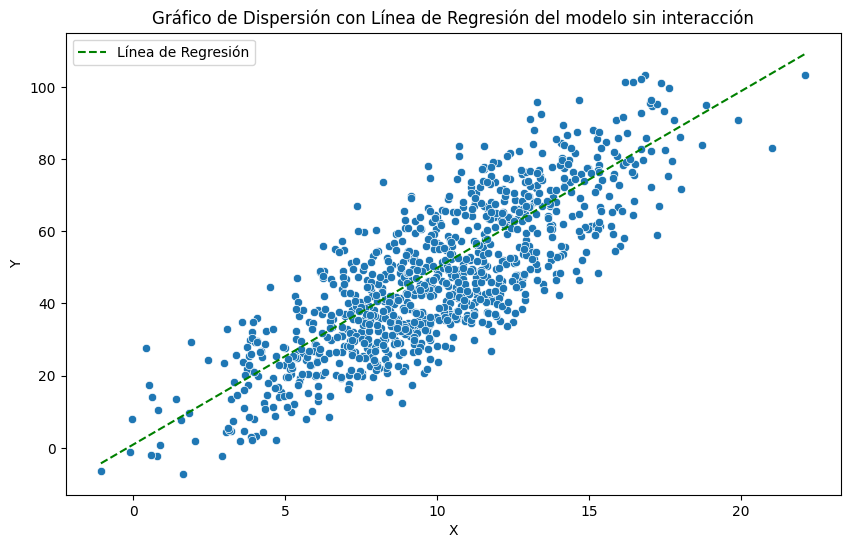

In [18]:
# Gráfico de Dispersión con Línea de Regresión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='X', y='Y', data=data1_sin_outliers)
x_vals = np.linspace(data1_sin_outliers['X'].min(), data1_sin_outliers['X'].max(), 100)
y_vals = model.params['Intercept'] + model.params['X'] * x_vals
plt.plot(x_vals, y_vals, color='green', linestyle='--', label='Línea de Regresión')
plt.title('Gráfico de Dispersión con Línea de Regresión del modelo sin interacción')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Mostrar el gráfico
plt.show()

_El modelo de regresión lineal generado para la variable dependiente Y con los predictores X y la variable categórica Ind (sin interacción) presenta los siguientes resultados:_

- **Coeficientes:**

    - El intercepto (valor de Y cuando X = 0 y "Ind" = 0) es aproximadamente 2.28, pero no es estadísticamente significativo (p-valor = 0.026).

    - El coeficiente de X es 4.755, lo que significa que por cada unidad de aumento en X, Y aumenta en promedio en 4.755, y este coeficiente es altamente significativo (p-valor < 0.001).
    - El coeficiente de Ind (para la categoría "Ind = 1") es -14.082, lo que indica que cuando "Ind" es 1, el valor de Y es, en promedio, 14.082 unidades menor que cuando "Ind" es 0, siendo este resultado también muy significativo (p-valor < 0.001).

- **R-cuadrado:** El R² es de 0.733, lo que indica que el 73.3% de la variabilidad de Y está explicada por el modelo.

**Conclusión:** _El modelo de regresión lineal con la variable categórica Ind y el predictor X es adecuado, ya que ambos predictores son significativos y explican una gran parte de la variabilidad de la variable dependiente Y_

#### **1b. Gráficas de X vs Y diferenciados por valores de variable categórica**

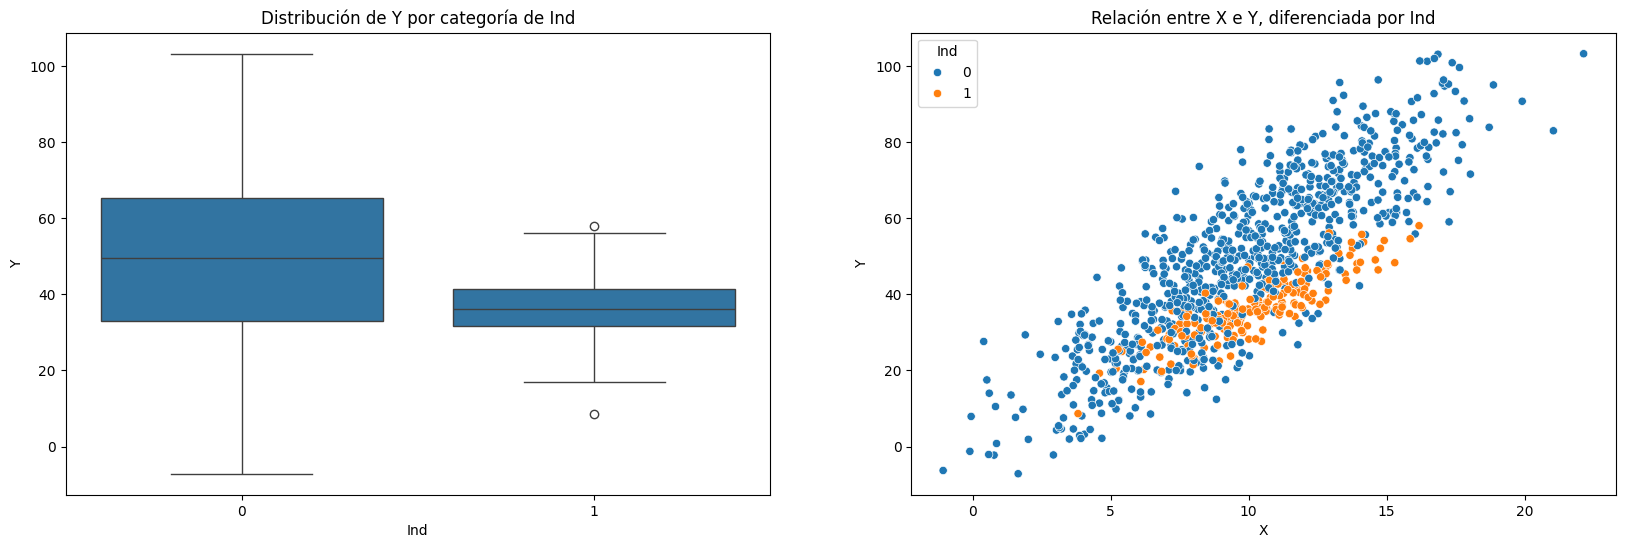

In [6]:
# Crear una figura con dos subplots uno al lado del otro
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Boxplot para observar la distribución de Y basada en la variable categórica 'Ind'
sns.boxplot(ax=axes[0], x='Ind', y='Y', data=data1_sin_outliers)
axes[0].set_title('Distribución de Y por categoría de Ind')

# Scatter plot de Y vs X, coloreado por Ind
sns.scatterplot(ax=axes[1], x='X', y='Y', hue='Ind', data=data1_sin_outliers)
axes[1].set_title('Relación entre X e Y, diferenciada por Ind')

plt.show()

_El análisis exploratorio inicial revela lo siguiente:_

- **Diagrama de Caja de Y por categoría de Ind:** En el gráfico **izquierdo**  muestra la distribución de Y separada por la variable categórica Ind. Se observa una diferencia notable en las distribuciones. Para **_Ind igual 0_**, los valores de Y son considerablemente más altos, con una mediana cercana a 50. En cambio, para  **_Ind igual 1_**, los valores de Y son mucho más bajos, con una mediana cercana a 0. Esto sugiere que el nivel de la variable categórica tiene un impacto significativo en los valores de Y.

- **Gráfico de dispersión entre X e Y, diferenciados por categoría de Ind**: El gráfico **derecho** se observa la relación entre X e  Y, con los puntos diferenciados por el valor de Ind. Aunque ambas categorías muestran una tendencia positiva entre X e Y, parece haber una diferencia en las distribuciones de los puntos para los diferentes valores de Ind. Específicamente, los puntos naranjas(**_Ind igual 1_**) están más concentrados y con menores valores de Y, lo que indica una pequeña diferencia en la relación entre X e Y según la categoría Ind.

Aunque las pendientes no varían de una manera drástica con diferentes valores para Ind, un modelo con interacciones podría ser mas adecuado para capturar adecuadamente la relación dependiente entre estas variables. Este tipo de modelo refleja que el efecto de X sobre Y cambia en función del nivel de Ind, lo que se traduce en una relación más compleja y dinámica que un modelo lineal sin interacciones no podría captar correctamente.


#### **1b. Modelo de regresión con interacción**

In [7]:
# Crear variable de interacción entre X e Ind
data1_sin_outliers['X_Ind'] = data1_sin_outliers['X'] * data1_sin_outliers['Ind']

# Ajustar el modelo y revisar resultados
model = smf.ols('Y ~ X + Ind + X_Ind', data=data1_sin_outliers).fit()

# Get the summary of the model to interpret the results
model_summary = model.summary()
model_summary

C:\Users\HP\AppData\Local\Temp\ipykernel_1464\2783304516.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1_sin_outliers['X_Ind'] = data1_sin_outliers['X'] * data1_sin_outliers['Ind']


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     929.2
Date:                Sun, 06 Oct 2024   Prob (F-statistic):          4.25e-286
Time:                        21:38:40   Log-Likelihood:                -3709.2
No. Observations:                 985   AIC:                             7426.
Df Residuals:                     981   BIC:                             7446.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9213      1.046      0.881      0.378      -1.131       2.973
X              4.8924      0.099     49.563      0.000       4.699       5.086
Ind            3.1286      3.613      0.866      0.387      -3.962      10.220
X_Ind         -1.6979      0.347     -4.894      0.000      -2.379      -1.017
==============================================================================
Omnibus:                        1.529   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.466   Jarque-Bera (JB):                1.466
Skew:                          -0.004   Prob(JB):                        0.481
Kurtosis:                       3.189   Cond. No.                         118.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


**Ecuación del modelo de regresión con interacción:** La fórmula del modelo de regresión lineal con interacción es:

$$
Y = 0.9213 + 4.8924 \cdot X + 3.1286 \cdot Ind - 1.6979 \cdot (X \cdot Ind)
$$


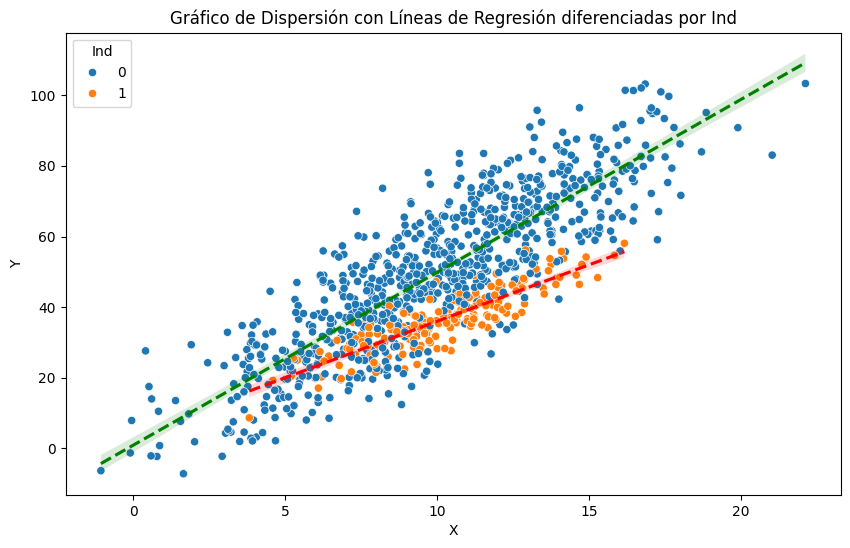

In [25]:
# Crear el gráfico de dispersión sin diferenciar por 'Ind'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='X', y='Y', hue='Ind', data=data1_sin_outliers)

# Añadir líneas de regresión para cada grupo en 'Ind'
for ind_value in data1_sin_outliers['Ind'].unique():
    subset = data1_sin_outliers[data1_sin_outliers['Ind'] == ind_value]
    sns.regplot(x='X', y='Y', data=subset, scatter=False, 
                line_kws={'color': 'green' if ind_value == 0 else 'red', 'linestyle': '--'})

plt.title('Gráfico de Dispersión con Líneas de Regresión diferenciadas por Ind')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

_El modelo de regresión lineal generado para la variable dependiente Y con los predictores X y la variable categórica Ind (con interacción) presenta los siguientes resultados:_

- **Coeficientes:**
  - Intercepto: El valor de Y cuando X = 0 e "Ind" = 0 es aproximadamente 0.92, pero no es estadísticamente significativo (p-valor = 0.378). 
  - Coeficiente de X: El coeficiente de X es 4.892, lo que significa que por cada unidad de aumento en X, Y aumenta en promedio en 4.892 unidades. Este coeficiente es altamente significativo (p-valor < 0.001).
  - Coeficiente de Ind: Para la categoría "Ind = 1", el valor de Y es, en promedio, 3.126 unidades mayor que cuando "Ind" es 0, aunque este resultado no es estadísticamente significativo (p-valor = 0.387).
  - Coeficiente de la interacción X: La interacción entre X e Ind tiene un coeficiente de -1.679, lo que indica que, cuando Ind = 1, el aumento en Y por cada unidad de X es, en promedio, 1.679 unidades menor comparado con el grupo de referencia (Ind = 0). Este coeficiente es altamente significativo (p-valor < 0.001).
- **R-cuadrado:** El R² es de 0.740, lo que indica que el 74% de la variabilidad de Y está explicada por el modelo con interacción.

**Conclusión:** El modelo de regresión lineal con interacción es levemente mejor en términos de ajuste, ya que el R² del modelo con interacción (0.740) es mayor que el del modelo sin interacción (0.733). Además, la inclusión de la interacción X es significativa (p-valor < 0.001), lo que sugiere que hay un efecto combinado entre X e Ind en la variable dependiente Y. Por lo tanto, el modelo con interacción sería preferible para capturar correctamente esta relación.

#### **1b. Supuestos del modelo con interacción**

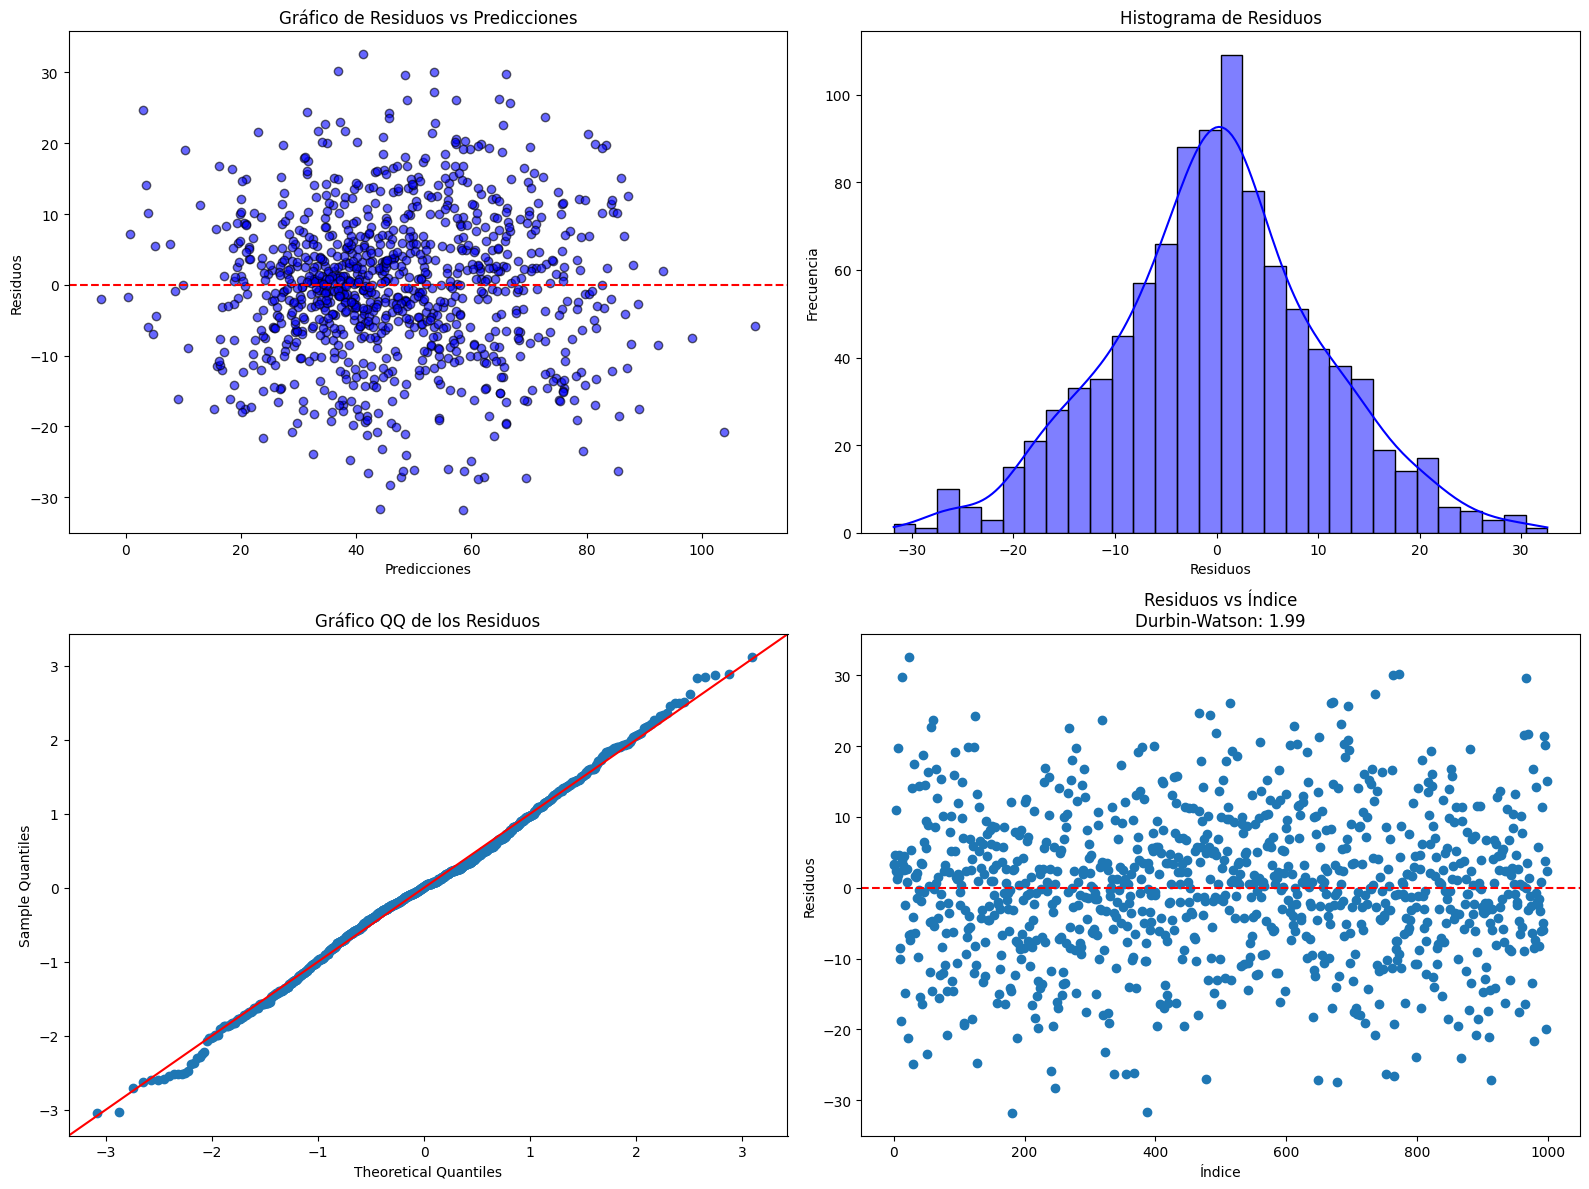

In [16]:
# Predicciones y residuos del modelo
predictions = model.fittedvalues
residuals = model.resid

# Calcular el estadístico de Durbin-Watson
dw_statistic = durbin_watson(residuals)

# Crear una figura con cuatro subplots en una matriz 2x2
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Gráfico de residuos vs predicciones
axes[0, 0].scatter(predictions, residuals, edgecolor='k', facecolor='blue', alpha=0.6)
axes[0, 0].axhline(0, color='red', linestyle='--')
axes[0, 0].set_title('Gráfico de Residuos vs Predicciones')
axes[0, 0].set_xlabel('Predicciones')
axes[0, 0].set_ylabel('Residuos')

# Histograma de residuos
sns.histplot(residuals, kde=True, color='blue', bins=30, ax=axes[0, 1])
axes[0, 1].set_title('Histograma de Residuos')
axes[0, 1].set_xlabel('Residuos')
axes[0, 1].set_ylabel('Frecuencia')

# Gráfico QQ para la normalidad de los residuos
sm.qqplot(residuals, line='45', fit=True, ax=axes[1, 0])
axes[1, 0].set_title('Gráfico QQ de los Residuos')

# Gráfico de residuos vs índice (para validar independencia)
axes[1, 1].plot(residuals, marker='o', linestyle='none')
axes[1, 1].axhline(0, color='red', linestyle='--')
axes[1, 1].set_title(f'Residuos vs Índice\nDurbin-Watson: {dw_statistic:.2f}')
axes[1, 1].set_xlabel('Índice')
axes[1, 1].set_ylabel('Residuos')

plt.tight_layout()
plt.show()

_El análisis de los supuestos del modelo con interacción muestra lo siguiente:_

- **Homoscedasticidad:** El gráfico de **residuos vs predicciones** muestra que los residuos se dispersan de manera razonablemente uniforme alrededor de 0, lo que indica que no hay una clara evidencia de heteroscedasticidad (variabilidad no constante de los residuos). Este es un buen indicio de que el supuesto de homoscedasticidad también se cumple.

- **Normalidad de los residuos:**
    - El histograma sugiere que los residuos se distribuyen de manera cercana a una normal, lo cual es un buen indicio de que el supuesto de normalidad de los residuos se cumple, aunque con algunos pequeños outliers o valores extremos.

    - El QQ plot indica que los residuos siguen aproximadamente una distribución normal, aunque hay algunos pequeños desvíos en los extremos. Sin embargo, en general, el supuesto de normalidad parece cumplirse.

- **Independencia de los residuos:** El gráfico de residuos vs. índice muestra residuos distribuidos aleatoriamente alrededor de cero, también se muestra que el estadístico de Durbin-Watson es cercano a 2 (_también visto en la tabla resumen del modelo_), por lo tanto se concluye que hay evidencia de autocorrelación en los residuos.

En resumen, el modelo con interacción es más adecuado para capturar la relación entre Y, X, y Ind, y los supuestos del modelo se cumplen de manera razonable, lo que valida su uso.